In [2]:
!pip install h2o
!pip install ctgan

     |████████████████████████████████| 164.8 MB 57 kB/s 
  Created wheel for h2o: filename=h2o-3.32.1.4-py2.py3-none-any.whl size=164871668 sha256=74384f360303b25da6dfedc87f7e18d182b7ea611c336e4d6bda9b891ddbd73f
  Stored in directory: /root/.cache/pip/wheels/c5/81/35/b2bcb5e7953976e6595c8dc940c70056a3ec85132e37d5b200
Successfully built h2o
     |████████████████████████████████| 22.3 MB 6.2 MB/s 
     |████████████████████████████████| 9.5 MB 49.0 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


IMPORTING REQUIRED LIBRARIES AND INITATING H2O CLUSTER

In [12]:
from pandas.api.types import is_numeric_dtype
from h2o.automl import H2OAutoML
#rom google.colab import files
from distutils.util import strtobool
from datetime import datetime
from IPython.display import HTML

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import base64
import numpy as np
import yaml
import random, os, sys
import pandas as pd
import logging
import csv
import optparse
import time
import json
import psutil
import zipfile
from ctgan import CTGANSynthesizer
import h2o

class DataGene():
  def __init__(self, csv_path, SyntheticData_path):
    self.csv_path = csv_path
    self.SyntheticData_path = SyntheticData_path
 

    if h2o.init(start_h2o=True):
      #continue
      # Set a minimum memory size and a run time in seconds
    #def ActivateH2O():
      min_mem_size = 6
      run_time = 222

      # Use 50% of availible resources
      pct_memory = 0.5
      virtual_memory = psutil.virtual_memory()
      min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0))
      print(min_mem_size)

      # 65535 Highest port no
      # Start the H2O server on a random port
      port_no = random.randint(5555, 55555)

      #  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
      try:
          h2o.init(strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no)  # start h2o
      except:
          logging.critical('h2o.init')
          h2o.download_all_logs(dirname=logs_path, filename=logfile)
          h2o.cluster().shutdown()
          sys.exit(2)


**FUNCTIONALITY DESIGNED TO GENERATE TABULAR DATA FOR SELECTED EPOCHS AND SELECTED COLUMNS/FEATURES**

In [5]:
def CreateSyntheticData(csvfile, EpochRange):
  RealDataset = pd.read_csv(csvfile)
  RealDataset = RealDataset.drop("Unnamed: 0", axis=1)
  Real_training_dataset = RealDataset.sample(frac=0.1, random_state=25)
  Real_testing_dataset = RealDataset.drop(Real_training_dataset.index)
  discrete_columns = RealDataset.columns
  print(Real_training_dataset.head(10))
  i = int(input())
  if i >= 0:
      epochs = (EpochRange[i])
      ctgan = CTGANSynthesizer(epochs=epochs)
      ctgan.fit(Real_training_dataset, discrete_columns)
      synthetic_data = ctgan.sample(Real_training_dataset.shape[0])
      csv_Epochs = synthetic_data.to_csv()
      b64 = base64.b64encode(csv_Epochs.encode())
      payload = b64.decode()
      html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
      html = html.format(payload=payload, title=f"Download CSVfile of {epochs} Epochs",
                          filename=f"SyntheticData_{epochs}Epochs.csv")
      return HTML(html)

In [6]:
CreateSyntheticData('/content/RealData.csv',[450,500,550])

       Area  Perimeter  ...  ShapeFactor3  ShapeFactor4
195   34337    667.785  ...      0.827841      0.997974
4921  78004   1080.753  ...      0.528123      0.995147
349   35414    680.978  ...      0.801831      0.998827
7703  39058    734.229  ...      0.681169      0.998844
7450  34242    682.082  ...      0.711050      0.994269
303   35130    678.016  ...      0.781857      0.999182
2839  72255   1067.662  ...      0.679568      0.993143
4834  76709   1075.733  ...      0.560252      0.988965
6929  58410    983.302  ...      0.420892      0.994996
267   34895    677.700  ...      0.874746      0.999535

[10 rows x 16 columns]
1


THIS PYTHON UTILITY GIVES BACK THREE LIST EACH LIST IS INDEPENDANT OF OTHERS AND DEPENDS ON THE DATATYPE

In [7]:
def checkDtype(csv_path):

  df = pd.read_csv(csv_path)
  numeric_columns = []
  column_index = []
  non_numeric_columns = []
  object_columns = []
  column_index2 = []
  column_index1 = []
  for column in df.columns:
    if is_numeric_dtype(df[column].dtype) == True:
        numeric_columns.append(column)
        column_index.append(df.columns.get_loc(column))
    elif is_object_dtype(df[column].dtype) == True:
        object_columns.append(column)
        column_index2.append(df.columns.get_loc(column))
    else:
        non_numeric_columns.append(column)
        column_index1.append(df.columns.get_loc(column))

  print(numeric_columns)
  print(object_columns)
  print(non_numeric_columns)


  RealData = df[numeric_columns]

  # function that takes in a dataframe and creates a text link to
  # download it (will only work for files < 2MB or so)
  csv = RealData.to_csv()
  b64 = base64.b64encode(csv.encode())
  payload = b64.decode()
  html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
  html = html.format(payload=payload,title="Download CSV file",filename="RealData.csv")
  return HTML(html)


In [8]:
checkDtype('/content/RealData.csv')

['Unnamed: 0', 'Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']
[]
[]


In [13]:
DataGene('/content/RealData.csv','/content/SyntheticData_450Epochs.csv')

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.11" 2021-04-20; OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04); OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpco182x8r
  JVM stdout: /tmp/tmpco182x8r/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpco182x8r/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.4
H2O_cluster_version_age:,22 days
H2O_cluster_name:,H2O_from_python_unknownUser_1vascl
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


**HERE THE GENERATED DATA IS TRAINED ON AUTO ML FRAMEWORK WHERE MODEL IS CHOOSEN BASED ON WHICH IS DATASET AND WHAT ARE DEPENDENT AND INDEPENDENT VARIABLES**

In [14]:
def H2OArchitecture(csv_path, SyntheticData_path):

  RealDataset = pd.read_csv(csv_path)
  RealDataset = RealDataset.drop("Unnamed: 0", axis=1)
  Real_training_dataset = RealDataset.sample(frac=0.8, random_state=25)
  Real_testing_dataset = RealDataset.drop(Real_training_dataset.index)
  discrete_columns = RealDataset.columns
  df_training = h2o.H2OFrame(Real_training_dataset)
  df_testing = h2o.H2OFrame(Real_testing_dataset)
  SyntheticData = pd.read_csv(SyntheticData_path)
  SyntheticData = SyntheticData.drop("Unnamed: 0", axis=1)
  df_syntheticData = h2o.H2OFrame(SyntheticData)
  print(df_syntheticData.head(10))

  discrete_columns = RealDataset.columns

  print(discrete_columns)
  print(df_training.head(10))
  print(len(Real_training_dataset.columns))

  print(df_testing.head(10))

#def H2oSyntheticFrame(synthetic_path):
# Synthetic_Data_Path = os.path.join('/' + 'content' + '/' + 'SyntheticData.csv')


  j = int(input())
  for j in range(4):
    if j > 0 :
      #print(Real_training_dataset.columns)
      df_training_Barred = df_training[df_training.columns[j-1]]
      x=df_training.columns
      y=df_training_Barred.columns[0]
      #print(df_training.head(10))
      print(x)
      print(y)

      aml = H2OAutoML(max_models=20, seed=1)
      aml.train(x=x, y=y, training_frame=df_training)

      print(aml.leaderboard)
      model_index=0
      glm_index=0
      glm_model=''
      aml_leaderboard_df=aml.leaderboard.as_data_frame()
      models_dict={}
      for m in aml_leaderboard_df['model_id']:
        models_dict[m]=model_index
        if 'StackedEnsemble' not in m:
          break 
        model_index=model_index+1  

      for m in aml_leaderboard_df['model_id']:
        if 'GLM' in m:
          models_dict[m]=glm_index
          break  
        glm_index=glm_index+1     
      models_dict

      best_model = h2o.get_model(aml.leaderboard[model_index,'model_id'])

      predictions = best_model.predict(df_testing)

      y_pred=h2o.as_list(predictions)
      print(y_pred[0:5])

      y_test=h2o.as_list(df_testing[df_testing.columns[j-1]])
      print(y_test[0:5])

      plt.figure(figsize=(10,5))
      plt.plot(y_pred, color='r', label=f"Predicted {y}")
      plt.plot(y_test, color='g', label=f"Actual {y}")
      plt.legend()
      plt.show()

      j += 1

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
58531,903.481,270.424,197.982,1.21258,0.886097,79803,312.196,0.772271,0.989422,0.773315,0.809783,0.00509503,0.00266807,0.473002,0.998555
42932,1021.12,375.911,189.531,1.81416,0.808099,163383,446.594,0.790503,0.988651,0.805262,0.783707,0.00619346,0.00206695,0.465655,0.995358
57011,1160.16,581.812,237.773,1.19369,0.580109,39692,280.138,0.768501,0.98723,0.831952,0.689116,0.00498165,0.00116231,0.827841,0.99724
36746,943.147,250.115,178.414,1.3285,0.886097,149846,280.871,0.658562,0.99161,0.927271,0.87315,0.00534559,0.00108254,0.778291,0.992411
78761,695.977,433.657,198.366,1.27793,0.640709,32246,227.53,0.809808,0.983317,0.935538,0.81489,0.00649327,0.00216856,0.807744,0.993388
58303,1021.12,394.59,184.789,2.25333,0.574999,81386,212.768,0.706648,0.986707,0.776984,0.715381,0.00706428,0.0014757,0.837929,0.994992
48112,742.531,228.194,217.377,1.72795,0.705524,47846,272.162,0.646451,0.987813,0.836524,0.804078,0.00670505,0.000956486,0.476275,0.995975
180261,1239.9,426.787,245.46,1.71654,0.874769,56827,235.396,0.618389,0.991176,0.851156,0.813694,0.00550442,0.00140829,0.500086,0.997558
34104,773.258,384.118,161.956,1.55203,0.809468,47846,326.207,0.76198,0.989386,0.955628,0.744398,0.00518566,0.000852113,0.452458,0.998937
95037,1022.6,393.179,172.85,2.03017,0.810337,183366,267.94,0.787476,0.991592,0.830855,0.889918,0.00635496,0.0026891,0.587272,0.997431



Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4'],
      dtype='object')


Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
34337,667.785,229.807,190.63,1.20551,0.558475,34583,209.091,0.809797,0.992887,0.967607,0.909858,0.00669269,0.00282927,0.827841,0.997974
78004,1080.75,433.657,230.141,1.88431,0.847561,78679,315.147,0.746528,0.991421,0.839216,0.72672,0.00555942,0.000956486,0.528123,0.995147
35414,680.978,237.138,190.368,1.24568,0.596285,35729,212.345,0.764749,0.991184,0.959663,0.89545,0.00669616,0.00265565,0.801831,0.998827
39058,734.229,270.198,184.264,1.46637,0.731392,39454,223.003,0.717556,0.989963,0.910451,0.82533,0.00691787,0.00197999,0.681169,0.998844
34242,682.082,247.619,177.085,1.39831,0.698972,34685,208.802,0.824711,0.987228,0.924902,0.843238,0.00723145,0.0022553,0.71105,0.994269
35130,678.016,239.183,187.16,1.27796,0.622654,35473,211.492,0.780147,0.990331,0.960303,0.884227,0.00680852,0.00256736,0.781857,0.999182
72255,1067.66,367.936,251.764,1.46143,0.729238,73640,303.312,0.710109,0.981192,0.796545,0.824359,0.00509219,0.00145061,0.679568,0.993143
76709,1075.73,417.529,236.531,1.76522,0.82406,77578,312.52,0.77256,0.988798,0.833004,0.7485,0.00544302,0.00105387,0.560252,0.988965
58410,983.302,420.352,177.813,2.36402,0.906126,59008,272.708,0.566669,0.989866,0.759142,0.648762,0.00719658,0.000786407,0.420892,0.994996
34895,677.7,225.37,197.233,1.14266,0.483848,35227,210.784,0.763032,0.990575,0.954769,0.935278,0.00645851,0.00304843,0.874746,0.999535



16


Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
30917,640.765,213.56,184.44,1.15788,0.504102,31280,198.406,0.770805,0.988395,0.946258,0.929038,0.00690753,0.00317422,0.863112,0.999384
31091,638.558,210.486,188.327,1.11766,0.446622,31458,198.963,0.786377,0.988334,0.958173,0.945254,0.00677001,0.00333398,0.893506,0.99864
31158,641.105,212.067,187.193,1.13288,0.469924,31474,199.177,0.781313,0.98996,0.952623,0.939219,0.00680618,0.00326701,0.882132,0.999349
31374,636.401,219.865,182.009,1.20799,0.560995,31604,199.866,0.769197,0.992722,0.97346,0.90904,0.00700789,0.00295188,0.826354,0.99823
31837,656.404,224.913,180.439,1.24647,0.596968,32238,201.336,0.785246,0.987561,0.928538,0.895174,0.0070645,0.00279828,0.801336,0.998843
32044,652.651,216.147,188.971,1.14381,0.485444,32395,201.989,0.778069,0.989165,0.945354,0.934499,0.00674532,0.00317321,0.873289,0.99888
32057,642.082,215.918,189.303,1.14059,0.480971,32301,202.03,0.779805,0.992446,0.977129,0.935679,0.00673545,0.0031846,0.875496,0.998585
32066,669.313,236.437,173.231,1.36486,0.68058,32481,202.059,0.780879,0.987223,0.89949,0.8546,0.00737344,0.00242605,0.73034,0.996815
32213,658.216,221.481,185.295,1.19529,0.547784,32585,202.521,0.762907,0.988584,0.934338,0.914395,0.00687552,0.00296497,0.836119,0.999401
32581,649.583,224.424,184.923,1.21361,0.566603,32851,203.675,0.772062,0.991781,0.970298,0.907544,0.00688819,0.00288241,0.823636,0.999569



1
['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']
Area
AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,mean_residual_deviance,rmse,mse,mae,rmsle
GBM_1_AutoML_20210731_011311,85081.7,291.688,85081.7,132.639,0.00311225
StackedEnsemble_AllModels_AutoML_20210731_011311,87900.7,296.481,87900.7,124.293,0.00299972
StackedEnsemble_BestOfFamily_AutoML_20210731_011311,87989.6,296.63,87989.6,124.529,0.00300296
XRT_1_AutoML_20210731_011311,195551,442.211,195551,130.432,0.00371076
GBM_4_AutoML_20210731_011311,258457,508.387,258457,122.768,0.00333172
GBM_3_AutoML_20210731_011311,273007,522.5,273007,105.744,0.00302455
DRF_1_AutoML_20210731_011311,279752,528.916,279752,138.906,0.00413601
GBM_2_AutoML_20210731_011311,318136,564.036,318136,186.199,0.00429303
XGBoost_grid__1_AutoML_20210731_011311_model_2,443634,666.058,443634,221.621,0.0052472
XGBoost_2_AutoML_20210731_011311,535103,731.508,535103,269.151,0.00575184



gbm prediction progress: |████████████████████████████████████████████████| 100%
        predict
0  30856.850259
1  31107.345699
2  31322.856110
3  31423.857551
4  31898.694445
    Area
0  30917
1  31091
2  31158
3  31374
4  31837


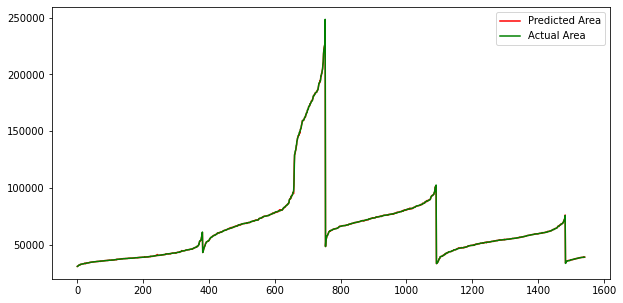

['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']
Perimeter
AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_BestOfFamily_AutoML_20210731_012232,19.6709,4.43519,19.6709,2.05582,0.00366899
StackedEnsemble_AllModels_AutoML_20210731_012232,19.6722,4.43533,19.6722,2.07517,0.00367393
GBM_4_AutoML_20210731_012232,20.4405,4.52112,20.4405,2.10063,0.00374296
GBM_1_AutoML_20210731_012232,21.2239,4.60695,21.2239,2.515,0.0040975
GBM_2_AutoML_20210731_012232,23.209,4.81758,23.209,2.51561,0.00405954
GBM_3_AutoML_20210731_012232,25.1496,5.01493,25.1496,2.59014,0.00425076
GBM_grid__1_AutoML_20210731_012232_model_1,32.3089,5.68409,32.3089,3.50408,0.00510878
XGBoost_grid__1_AutoML_20210731_012232_model_4,35.0317,5.91876,35.0317,3.39835,0.00532496
XGBoost_3_AutoML_20210731_012232,38.1431,6.17601,38.1431,3.53781,0.0053692
GBM_grid__1_AutoML_20210731_012232_model_2,38.7844,6.22771,38.7844,3.22717,0.00516461



gbm prediction progress: |████████████████████████████████████████████████| 100%
      predict
0  634.796210
1  631.432487
2  633.998193
3  635.751013
4  658.183500
   Perimeter
0    640.765
1    638.558
2    641.105
3    636.401
4    656.404


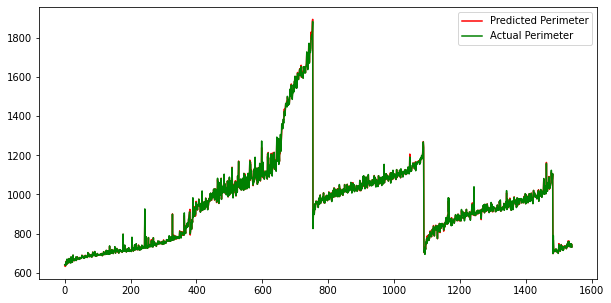

['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']
MajorAxisLength
AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_AutoML_20210731_013120,2.8015,1.67377,2.8015,0.780382,0.00390877
StackedEnsemble_BestOfFamily_AutoML_20210731_013120,2.83214,1.6829,2.83214,0.78162,0.00392898
GBM_4_AutoML_20210731_013120,2.9666,1.72238,2.9666,0.806227,0.0040235
GBM_3_AutoML_20210731_013120,2.97663,1.72529,2.97663,0.904934,0.00409123
GBM_1_AutoML_20210731_013120,3.16516,1.77909,3.16516,1.04799,0.00433712
GBM_2_AutoML_20210731_013120,3.2588,1.80521,3.2588,1.03785,0.0043704
XRT_1_AutoML_20210731_013120,3.70256,1.9242,3.70256,0.867525,0.00451516
DRF_1_AutoML_20210731_013120,3.95691,1.9892,3.95691,0.888868,0.00467247
GBM_grid__1_AutoML_20210731_013120_model_1,4.30141,2.07398,4.30141,1.26596,0.00512518
DeepLearning_1_AutoML_20210731_013120,4.62187,2.14985,4.62187,1.53953,0.00717991



gbm prediction progress: |████████████████████████████████████████████████| 100%
      predict
0  212.443274
1  208.834513
2  211.416292
3  219.321855
4  225.051641
   MajorAxisLength
0       213.560089
1       210.486255
2       212.066975
3       219.865394
4       224.912554


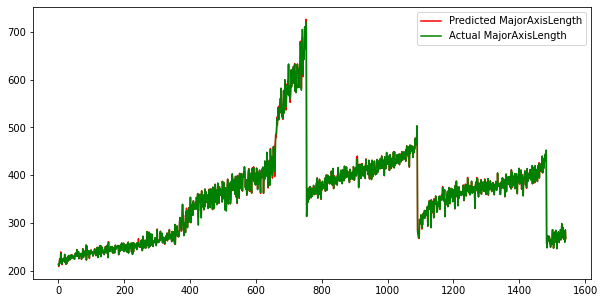

In [15]:
H2OArchitecture('/content/RealData.csv', '/content/SyntheticData_450Epochs.csv')